In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from skimage import color
import scipy.signal as signal

%matplotlib inline

In [8]:
# Question 1 a)
def convolution2D(F, I):
    '''
    Returns F∗I, the convolution of image I with filter F such that the result is the same size as the input image.
    
    I: a 2D matrix of integers
    F: a 2D square matrix of integers, with odd dimension
    
    result: F∗I
    '''
    
    # Zero-pad I based on the size of F
    k = np.shape(F)[0]
    padWidth = int((k-1)/2) 
    I = np.pad(I, ((padWidth, padWidth), (padWidth, padWidth)), 'constant')
    
    # initialize matrix for the result of convolution
    result = np.zeros(np.shape(I))
    
    # Flip the filter in both dimensions (so that you can just apply correlation)
    F = np.flipud(F)
    F = np.fliplr(F)
    
    # Convert filter to 1D array to use vector form of correlation formula
    F = np.ravel(F)
    
    # Perform correlation
    for i in range(padWidth, I.shape[0]-padWidth):
        for j in range(padWidth, I.shape[1]-padWidth):
            
            # Apply filter to I(i,j) by converting the sub-matrix centered at I(i,j),
            # and has the same dimensions as the filter, to a 1D array
            subMatrix = I[i-padWidth:i+padWidth+1, j-padWidth:j+padWidth+1]
            subMatrix = np.ravel(subMatrix)
            
            result[i,j] = np.dot(F, subMatrix)
            
    
    # Remove the padding
    result = result[padWidth:result.shape[0]-padWidth, padWidth:result.shape[1]-padWidth]
    return result
    

In [9]:
# Testing 1 a) against built in convolution function

I = np.random.randint(64, size=(16, 6))
F = np.random.randint(64, size=(5, 5))

print(convolution2D(F,I) == signal.convolve(I,F, mode='same'))


[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


In [10]:
# Question 1 b)

def convolutionRGB(F, I):
    '''
    Returns F∗I, the convolution of an RGB image I with filter F such that the result is the same size as the input image.
    
    I: a 3D matrix of integers (consists of three 2D matrices, one for each channel of RGB)
    F: a 3D square matrix of integers, with odd dimension
    
    Both F and I have third dimension equal to 3. That is, F consists of three 2D filters: one for each channel in the RGB image
    
    result: F∗I, of same dimensions as I (ie. a 3 channel (RGB) image)
    '''
    # unpack the RGB components and their corresponding filters
    F1, F2, F3 = np.moveaxis(F, 2, 0)
    I1, I2, I3 = np.moveaxis(I, 2, 0)
    
    return np.moveaxis(np.array([convolution2D(F1, I1), convolution2D(F2, I2), convolution2D(F3, I3)]), 0, 2)

1.0


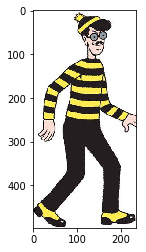

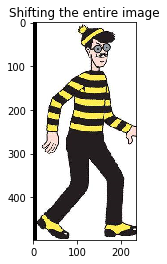

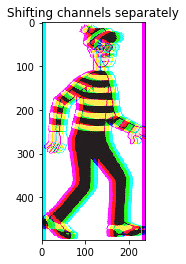

In [12]:
# Testing 1b)
im = plt.imread("template.png")

I = im[:,:,:3]

plt.imshow(I)
plt.show()

# Create a 2D "shift-to-the-right" filter
F1 = np.zeros((17,17))
F1[8][16] = 1


F = np.array([F1, F1, F1])  # 3D filter with first dimension equal to 3 (shifts pixels to the right with convolution)
F = np.moveaxis(F, 0, 2)    # third dimension should be equal to three, in order to be used in the function


I2 = convolutionRGB(F, I)
plt.imshow(I2)
plt.title("Shifting the entire image")
plt.show()

# "do nothing" filter
nothing = np.zeros((17,17))
nothing[np.shape(nothing)[0]//2, np.shape(nothing)[1]//2] = 1



F = np.array([F1, np.fliplr(F1), nothing])  # shift channels separately (one left, one right, one not at all)
F = np.moveaxis(F, 0, 2) 


I2 = convolutionRGB(F, I)
plt.imshow(I2)
plt.title("Shifting channels separately")
plt.show()


In [764]:
# Some testing of my filter for 2 a)

F1 = np.array([[1,2],
               [3,4]])
F2 = np.array([[5,6],
               [7,8]])
I = np.random.randint(10, size=(5,5))
F3 = sp.signal.convolve(F1,F2, mode='full')  # gives same result as my written filter

G1 = sp.signal.convolve(sp.signal.convolve(I,F1, mode='full'), F2, mode='full')
G2 = sp.signal.convolve(I, F3, mode='full')

print(F3)
print("\n The above filter matches my formula (see pdf), and as shown by the matrix below, convolving it with I "
      "\n is equivalent to convolving I with F1 and F2 separately (with 'full' convolution) \n")
print(G1==G2)  
# This shows that convolving I with the precomputed filter that is a convolution of the two filters is 
# identical to convolving one at a time with I


[[ 5 16 12]
 [22 60 40]
 [21 52 32]]

 The above filter matches my formula (see pdf), and as shown by the matrix below, convolving it with I 
 is equivalent to convolving I with F1 and F2 separately (with 'full' convolution) 

[[ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]]


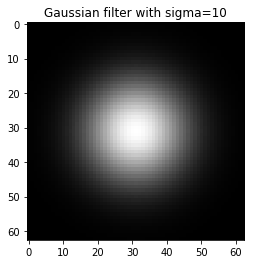

In [765]:
# 2 b)

# helper function
def Gaussian2D(X, Y, sigma):
    '''
    2D isotropic gaussian pdf
    '''
    A = 1.0/(2.0*np.pi*(sigma**2.0))
    B = (2.0*sigma**2.0)
    
    return A*np.exp(  ( ((-1.0)/B)  *   (X**2.0 + Y**2.0)   )   )


# main function
def gaussianFilter(sigma):
    '''
    Returns an isotropic gaussian filter with given standard deviation (sigma). The size of the filter is about floor(3*sigma),
    since in lecture it was said that 3-5*sigma is usually a good choice for the size of the filter
    
    Note: the filter returned is modified to always be odd in dimension, so that the center pixel is the peak of the gaussian
          (this is whay the size is "about floor(5*sigma)")
    '''
    size = np.floor(3*sigma)
    
    # make sure size is odd:
    if size%2 == 0:
        size += 1
    
    # create meshgrid
    
    x = np.arange(-1*size, size+1)

    y = np.arange(-1*size, size+1)

    X, Y = np.meshgrid(x,y)

    # apply gaussian pdf to meshgrid
    g = Gaussian2D(X, Y, sigma)
    
    # normalize
    return g/np.sum(g)



g = gaussianFilter(10)
plt.imshow(g, cmap='gray')
plt.title("Gaussian filter with sigma=10")
plt.show()


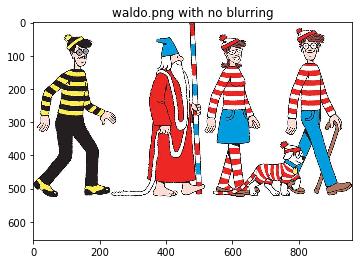

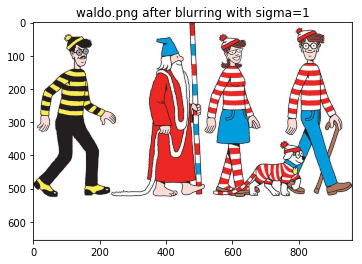

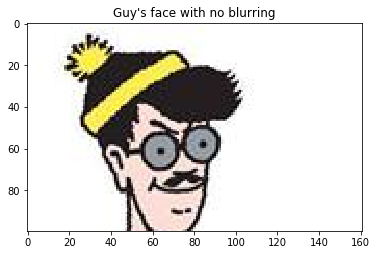

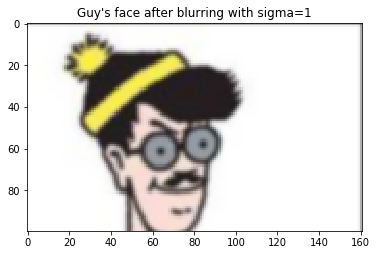

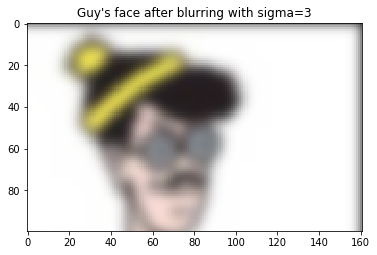

In [766]:
# 2 c)

# read and show waldo.png
waldo = plt.imread('waldo.png')[:,:,:3]  # remove the transparency channel
plt.imshow(waldo)
plt.title("waldo.png with no blurring")
plt.show()

# create gaussian filter with sigma = 1 (with 3 channels)
G = gaussianFilter(1)
F = np.array([G, G, G]) 
F = np.moveaxis(F, 0, 2)

# apply the filter to waldo.png
I = convolutionRGB(F,waldo)

# show the smoothed image
plt.imshow(I)
plt.title("waldo.png after blurring with sigma=1")

plt.show()



# more tests showing how the filter blurs the yellow guy's face as sigma increases

w = plt.imread('template.png')[:,:,:3]  # remove the transparency channel
plt.imshow(w[0:100, 75:250])
plt.title("Guy's face with no blurring")
plt.show()


G = gaussianFilter(1)
F = np.array([G, G, G])
F = np.moveaxis(F, 0, 2)


I = convolutionRGB(F,w)

plt.imshow(I[0:100, 75:250])
plt.title("Guy's face after blurring with sigma=1")
plt.show()


G2 = gaussianFilter(3)
F2 = np.array([G2, G2, G2])
F2 = np.moveaxis(F2, 0, 2)
I2 = convolutionRGB(F2,w)

plt.imshow(I2[0:100, 75:250])
plt.title("Guy's face after blurring with sigma=3")
plt.show()


In [767]:
# 3) a

# Note: images are not smoothed by this function (question didn't specify). 
#       See code below for examples of smoothing + gradient magnitude

def gradMagnitude(I):
    '''
    Calculates and returns the gradient magnitudes and partial derivatives of the given RGB image, I
    
    I: RGB image, a 3D array of dimension LxWx3
    
    return: Three 2D matrices containing the magniture of the gradient, and the partial derivatives in x and y respectively
    '''
    I = color.rgb2gray(I)# convert to grayscale (professor said we are allowed)
    
    partialX = np.array([1, -1])  # filter to compute partial derivative in x (using convolution)
    partialY = np.array([1, -1])  # filter to compute partial derivative in x (using convolution)

    # initialize matrices of horizontal and vertical derivatives
    dX = np.zeros(np.shape(I))
    dY = np.zeros(np.shape(I))

    # apply horizontal derivative to each row
    for i in range(np.shape(I)[0]):
        dX[i] = sp.signal.convolve(I[i],partialX, mode='same')

    # apply vertical derivative to each column
    for i in range(np.shape(I)[1]):
        dY[:,i] = sp.signal.convolve(I[:,i],partialY, mode='same') 
    
    gm = np.sqrt(dX**2 + dY**2)
    
    return gm, dX, dY



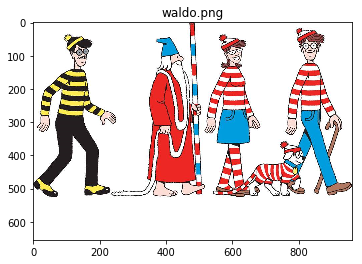

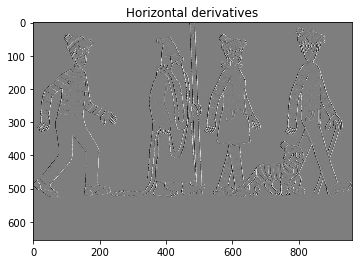

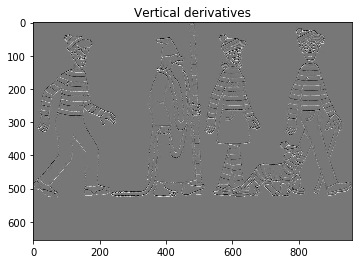

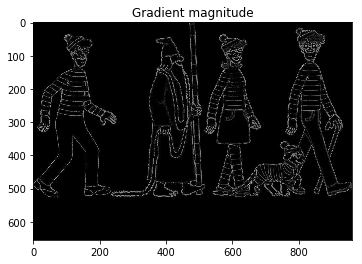

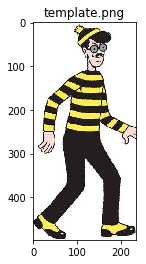

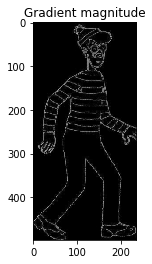

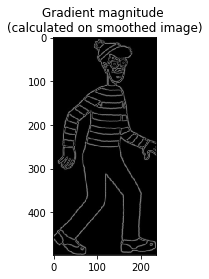

In [768]:
# Testing 3 a)

# read in the image
waldo = plt.imread('waldo.png')[:,:,:3]  # remove the transparency channel
plt.imshow(waldo)
plt.title("waldo.png")
plt.show()

# test the function
gm, dX, dY = gradMagnitude(waldo)

# plot partial derivatives and gradient magnitude
plt.imshow(dX, cmap='gray')
plt.title("Horizontal derivatives")
plt.show()

plt.imshow(dY, cmap='gray')
plt.title("Vertical derivatives")
plt.show()

plt.imshow(gm, cmap='gray')
plt.title("Gradient magnitude")
plt.show()

# read in the other image
template = plt.imread('template.png')[:,:,:3]  # remove the transparency channel
plt.imshow(template)
plt.title("template.png")
plt.show()

# test the function
gm, dX, dY = gradMagnitude(template)

plt.imshow(gm, cmap='gray')
plt.title("Gradient magnitude")
plt.show()

# smoothing
G = gaussianFilter(1)
F = np.array([G, G, G])
F = np.moveaxis(F, 0, 2)

# smooth the image
template2 = convolutionRGB(F,template)
gm, dX, dY = gradMagnitude(template2)

plt.imshow(gm, cmap='gray')
plt.title("Gradient magnitude \n(calculated on smoothed image)")
plt.show()

In [769]:
# 3 b)

# Note: again, didn't smooth the image prior to calculating derivatives as question didn't specify

def locateTemplate(template, I):
    '''
    Returns the location of the template in the image I based on the magnitude of gradients, as well as the cross-correlation 
    of the magnitudes of gradients for the template and image (for visualization)
    '''
    # grt the gradient magnitudes of each image
    imageEdges, _, _ = gradMagnitude(waldo)
    templateEdges, _, _ = gradMagnitude(template)
    
    # apply cross-correlation
    C = sp.signal.correlate(imageEdges, templateEdges, mode="same")
    # Note: seeing as 3a) said we could use the built in convolution function, I assumed we were allowed to use the built in
    # correlation function here (especially since question 1 was basically writing our own correlation function, but flipping a 
    # filter to make it convolution instead)
    
    # find the peak of the cross-correlation
    loc = np.unravel_index(np.argmax(C), np.shape(C))
    
    return loc, C

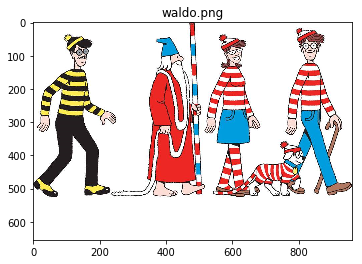

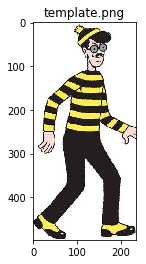

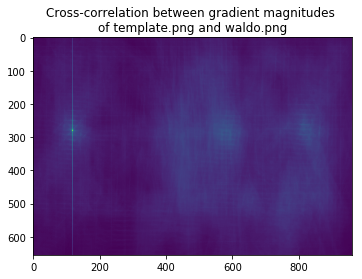

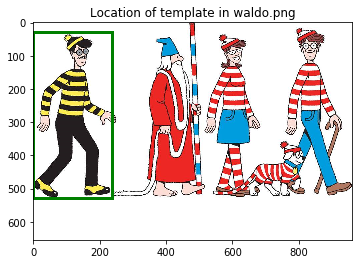

In [770]:
# testing 3 b)

# read in the image
waldo = plt.imread('waldo.png')[:,:,:3]  # remove the transparency channel
plt.imshow(waldo)
plt.title("waldo.png")
plt.show()
template = plt.imread('template.png')[:,:,:3]
plt.imshow(template)
plt.title("template.png")
plt.show()



# find the template using gradient magnitudes
loc, corr = locateTemplate(template, waldo)

plt.imshow(corr)
plt.title("Cross-correlation between gradient magnitudes \nof template.png and waldo.png")
plt.show()


# draw box around template
width = np.shape(template)[1]
height = np.shape(template)[0]
x = loc[1] - width//2  # need to shift the cordinates since plt.Rectangle doesn't center the rectangle at the given coords
y = loc[0] - height//2

fig, ax = plt.subplots()
border = plt.Rectangle([x,y], width, height, fill=False, color='green', lw=3.0)
ax.add_patch(border)
plt.imshow(waldo)
plt.title("Location of template in waldo.png")
plt.show()


In [771]:
# Question 4

def canny(I, thresh, sigma):
    '''
    Implementation of the Canny edge detector. Performs gaussian smoothing on RGB mage I, then calculates gradient magnitudes. 
    Returns a 2D array containing the gradient magnitudes that were above the threshold and survived non-maxima supression.
    
    I: RGB image
    thresh: the fraction of the maximum gradient magnitude that will be used as the threshold
    sigma: the std deviation of the gaussian filter used for smoothing
    '''
    
    # create gaussian filter with given sigma (with 3 channels)
    G = gaussianFilter(sigma)
    F = np.array([G, G, G]) 
    F = np.moveaxis(F, 0, 2)

    # Smooth the image
    I = convolutionRGB(F,I)
    
    # get the partial derivatives and gradient magnitude (gm)
    gm, dX, dY = gradMagnitude(I)
    
    # set threshold
    thresh = thresh*np.max(gm)
    
    # find direction of gradient at each pixel
    gd = np.arctan(dX, dY)  # note that np.arctan returns angles between -pi/2 and pi/2
    

    # initialize matrix for non-max suppression
    supressedI = np.zeros(np.shape(gm))
    
    # Non-Max suppression
    for i in range(1,np.shape(gm)[0]-1): # don't include pixels on the border of the image (for simplicity)
        for j in range(1, np.shape(gm)[1]-1):
            
            #if gradient magnitude is below threshold, don't include as an edge
            if gm[i,j] < thresh:
                continue
        
            # if gradient is "vertical"
            if (3*np.pi/8 < gd[i,j] and gd[i,j] <= np.pi/2) or (-np.pi/2 < gd[i,j] and gd[i,j] <= -3*np.pi/8):
                #compare to pixels above and below
                p1 = gm[i-1, j]
                p2 = gm[i+1, j]
                
                        # if gradient is "horizontal"
            elif (-np.pi/8 < gd[i,j] and gd[i,j] <= np.pi/8):
                #compare to pixels to the left and right
                p1 = gm[i, j-1]
                p2 = gm[i, j+1]
            
            # if gradient is "up and to the right"
            elif np.pi/8 < gd[i,j] and gd[i,j] <= 3*np.pi/8:
                # compare to top right and bottom left neighbours
                p1 = gm[i-1, j+1]
                p2 = gm[i+1, j-1]
            


            # if gradient is "down and to the right"            
            elif -3*np.pi/8 <= gd[i,j] and gd[i,j] <= -np.pi/8:
                # compare to bottom right and top left neighbours
                p1 = gm[i+1, j+1]
                p2 = gm[i-1, j-1]

                
            # if pixel is larger than both of its neighbours, include it as an edge
            if (gm[i,j] >= p1) and (gm[i,j] >= p2):
                supressedI[i,j] = gm[i,j]
                

                

    return supressedI
    

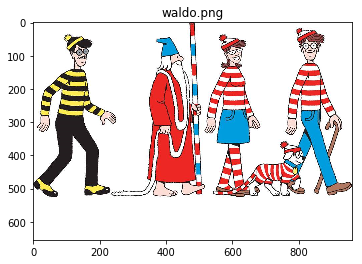

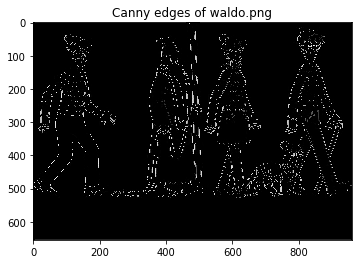

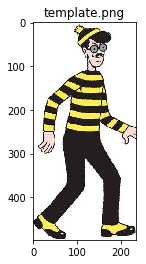

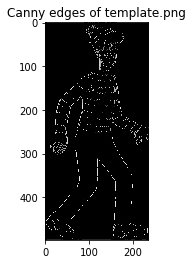

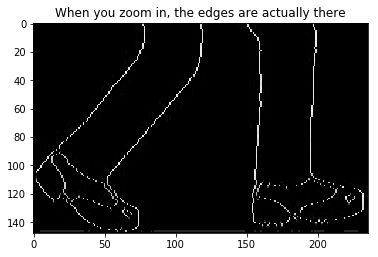

In [772]:
# testing question 4

# Note: the edges are very thin, so some edges can't really be seen when plotting, but if you only plot
#       a small section of the image (ie. zoom in) you can see that the edges are actually there

plt.imshow(waldo)
plt.title("waldo.png")

plt.show()
waldoEdges = canny(waldo, 0, 1)
plt.imshow(waldoEdges, cmap='gray')
plt.title("Canny edges of waldo.png")
plt.show()


result = canny(template, 0, 1)
plt.imshow(template)
plt.title("template.png")
plt.show()


plt.imshow(result, cmap='gray')
plt.title("Canny edges of template.png")
plt.show()
plt.imshow(result[350:550,:], cmap='gray')
plt.title("When you zoom in, the edges are actually there")
plt.show()

